# Intro to Python 
## Lesson 6b – API Practice (Stock Market, etc.)

**Date:** Aug 6, 2021 <br>
**Programmer:** Shanice Bailey <br>
**Goal:** Have some fun exploring some small datasets! (30 min), adapted from past [lesson](https://rabernat.github.io/research_computing/pandas.html)

In [ ]:
#import libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

## Stock Market Data
> Goal: Plot some stocks!

Read in some stock market data from Google finance

In [ ]:
!curl -L -o goog.csv https://tinyurl.com/biopy-google
!curl -L -o aapl.csv https://tinyurl.com/biopy-aapl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   570    0   570    0     0   2095      0 --:--:-- --:--:-- --:--:--  2087
100  238k  100  238k    0     0   667k      0 --:--:-- --:--:-- --:--:--  667k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   570    0   570    0     0   2118      0 --:--:-- --:--:-- --:--:--  2118
100  220k  100  220k    0     0   625k      0 --:--:-- --:--:-- --:--:--  625k


In [ ]:
! head goog.csv

Date,Open,High,Low,Close,Adj Close,Volume
2005-11-14,195.327866,198.366470,195.033966,197.743805,197.743805,15674332
2005-11-15,196.453644,197.758759,194.745041,195.666595,195.666595,17314456
2005-11-16,197.360245,198.680298,196.319153,198.331604,198.331604,17455583
2005-11-17,200.149796,201.151031,199.019028,200.971710,200.971710,18493459
2005-11-18,200.991638,201.494751,199.178436,199.357758,199.357758,14103867
2005-11-21,198.839706,204.224518,196.010300,203.915680,203.915680,20747677
2005-11-22,203.561996,207.875824,202.356522,207.457397,207.457397,19263936
2005-11-23,207.741333,211.567001,207.113693,210.640472,210.640472,20245602
2005-11-25,212.095016,213.574463,211.855911,213.509720,213.509720,9716484


In [ ]:
goog = pd.read_csv('goog.csv')

In [ ]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-11-14,195.327866,198.366470,195.033966,197.743805,197.743805,15674332
1,2005-11-15,196.453644,197.758759,194.745041,195.666595,195.666595,17314456
2,2005-11-16,197.360245,198.680298,196.319153,198.331604,198.331604,17455583
3,2005-11-17,200.149796,201.151031,199.019028,200.971710,200.971710,18493459
4,2005-11-18,200.991638,201.494751,199.178436,199.357758,199.357758,14103867


> Let's get rid of that pesky index

In [ ]:
goog = pd.read_csv('goog.csv', parse_dates=[0], index_col=0)
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-11-14,195.327866,198.366470,195.033966,197.743805,197.743805,15674332
2005-11-15,196.453644,197.758759,194.745041,195.666595,195.666595,17314456
2005-11-16,197.360245,198.680298,196.319153,198.331604,198.331604,17455583
2005-11-17,200.149796,201.151031,199.019028,200.971710,200.971710,18493459
2005-11-18,200.991638,201.494751,199.178436,199.357758,199.357758,14103867


In [ ]:
#get info on the dataframe
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3271 entries, 2005-11-14 to 2018-11-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3271 non-null   float64
 1   High       3271 non-null   float64
 2   Low        3271 non-null   float64
 3   Close      3271 non-null   float64
 4   Adj Close  3271 non-null   float64
 5   Volume     3271 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


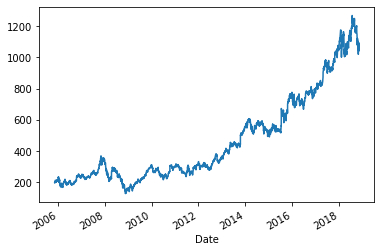

In [ ]:
goog.Close.plot()

In [ ]:
#load in apple stock
aapl = pd.read_csv('aapl.csv', parse_dates=[0], index_col=0)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3271 entries, 2005-11-14 to 2018-11-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3271 non-null   float64
 1   High       3271 non-null   float64
 2   Low        3271 non-null   float64
 3   Close      3271 non-null   float64
 4   Adj Close  3271 non-null   float64
 5   Volume     3271 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [ ]:
#create new df of closing stock prices
aapl_close = aapl.Close.rename('aapl')
goog_close = goog.Close.rename('goog')
stocks = pd.concat([aapl_close, goog_close], axis=1)
stocks.head()

,aapl,goog
Date,,
2005-11-14,2.194643,197.743805
2005-11-15,2.224286,195.666595
2005-11-16,2.319643,198.331604
2005-11-17,2.304286,200.971710
2005-11-18,2.305714,199.357758


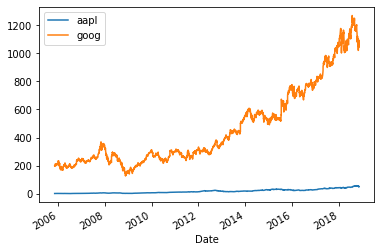

In [ ]:
stocks.plot()

> Pandas knows how to take correlations. And tons of [other computations](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html).

In [ ]:
stocks.corr()

,aapl,goog
aapl,1.000000,0.941944
goog,0.941944,1.000000


> Because it understands times, it can do really cool stuff like resampling (i.e. frequency conversions).

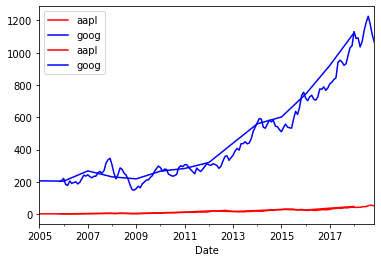

In [ ]:
# resample by taking the mean over each month

fig, ax = plt.subplots()
stocks.resample('MS').mean().plot(ax=ax, color=['r', 'b'])
# and each year
stocks.resample('AS').mean().plot(ax=ax, color=['r', 'b'])

The string `QS` means "month start". The string `AS` mean "year start". There is a long list of possible frequency aliases.

We can also apply other reduction operations with resample. These are described in the [resample docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

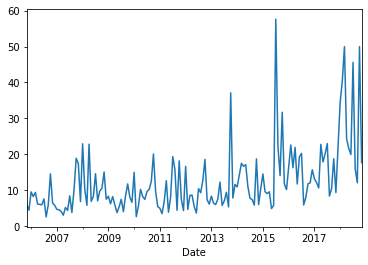

In [ ]:
# get resample object
rs = stocks.goog.resample('MS')
# standard deviation of each month
rs.std().plot()

## Temperature Data
> Goal: Plot anomalous temperature and find the hottest years in the dataset

We download some timeseries data from the [Berkeley Earth(http://berkeleyearth.org/) surface temperature dataset. This is timeseries data from various locations around earth. Let's get our local temperatures.



In [ ]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322k  100  322k    0     0   456k      0 --:--:-- --:--:-- --:--:--  456k


> If we examine this data, we see it is NOT a well formated CSV file. Loading it will be a bit painful, but Pandas makes the job retatively easy.

In [ ]:
! head -30 nyc_temp.txt

% This file contains an extracted local summary of land-surface 
% temperature results produced by the Berkeley Earth averaging 
% method for the location: 
% 
%    40.99 N, 74.56 W
% 
% The Berkeley Earth method takes temperature observations from a large 
% collection of weather monitoring stations and produces an estimate of 
% the underlying global temperature field across all of the Earth's 
% land areas.  Once this temperature field has been generated, it is 
% possible to estimate the temperature evolution of individual locations 
% simply by sampling the field at the locaiton in question.  This 
% file contains such a local estimate.
% 
% Temperatures are in Celsius and reported as anomalies relative to the 
% Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence 
% interval for statistical noise and spatial undersampling effects.  Such 
% uncertainties are expected to account for the effects of random 
% noise as well as random biases affecting station trends 

In [ ]:
! head -72 nyc_temp.txt | tail -8

% values are available.
% 
%                  Monthly          Annual          Five-year        Ten-year        Twenty-year
% Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
  1743     4    -2.959  1.881       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743     5    -0.467  1.278       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743     6       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN


In [ ]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] #+ 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

,year,month,monthly_anom
0,1743,4,-2.959
1,1743,5,-0.467
2,1743,6,NaN
3,1743,7,0.084
4,1743,8,NaN


In [ ]:
temp

,year,month,monthly_anom
0,1743,4,-2.959
1,1743,5,-0.467
2,1743,6,NaN
3,1743,7,0.084
4,1743,8,NaN
...,...,...,...
3328,2020,8,1.656
3329,2020,9,0.580
3330,2020,10,1.033
3331,2020,11,2.503


> We have year and month, we need a day

In [ ]:
#first let's drop monthly_anom column
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1

In [ ]:
#now create a datetime index to be our new index
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))

In [ ]:
date_index

DatetimeIndex(['1743-04-01', '1743-05-01', '1743-06-01', '1743-07-01',
               '1743-08-01', '1743-09-01', '1743-10-01', '1743-11-01',
               '1743-12-01', '1744-01-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=3333, freq=None)

In [ ]:
#now set the new index to be our date_index that we just created
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

,monthly_anom
1743-04-01,-2.959
1743-05-01,-0.467
1743-06-01,NaN
1743-07-01,0.084
1743-08-01,NaN


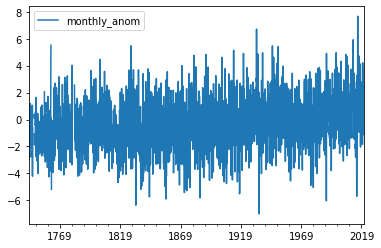

In [ ]:
temp.plot();

> Pandas can do both time-based resampling and operation over fixed-length rolling windows. These are very similar but distinct; see discussion in [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#windowing-functions).

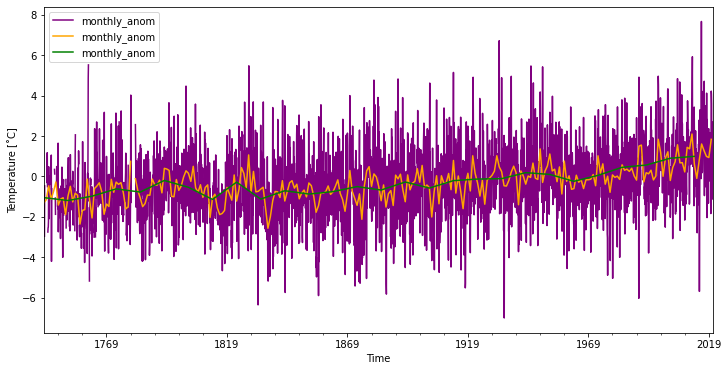

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
temp.plot(ax=ax, color='purple')
temp.resample('AS').mean().plot(ax=ax, color='orange')
temp.resample('10AS').mean().plot(ax=ax, color='green')
plt.xlabel('Time')
plt.ylabel('Temperature [˚C]');

> `resampling` aliases [link here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
Resampling basically is like groupby where you group your items in a specified window size, then you tell python what operation you want done on your groups. Resampling is usually used for datetimeindex objects instead of `groupby`.

> The concept of rolling window calculation is most primarily used in signal processing and time series data. In very simple words we take a window size of our choosing, say 5 days at a time and perform some desired mathematical operation on it.

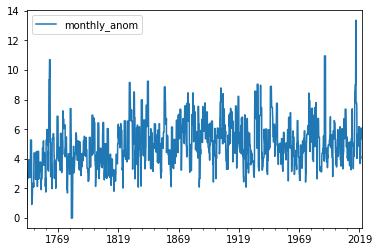

In [ ]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot();

To create a "climatology" (i.e. the average of all same months), we can use Pandas' [`groupby`](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) functionality.

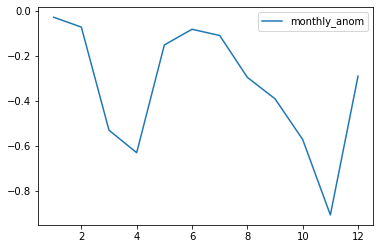

In [ ]:
# diurnal cycle has been removed!
temp.groupby(temp.index.month).mean().plot();

> Let's find the hottest years


In [ ]:
temp.groupby(temp.index.year).mean().sort_values('monthly_anom', ascending=False).head(10)

,monthly_anom
2012,2.097833
1998,1.837333
2020,1.834583
2016,1.604500
2006,1.567250
1991,1.550417
1990,1.498417
2010,1.439250
2011,1.364917
1949,1.361750


## Rats!
> Goal: Become experts in using `groupby`


Now we will explore groupby's capabilities more in a public dataset from the City of New York: the [Rat Information Portal](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj)!

In [ ]:
rats = pd.read_csv('https://raw.githubusercontent.com/rahim-hashim/Intro-Python-Biology/main/Rodent_Inspection_cut.csv',
                   parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [ ]:
rats.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11362943,PC7165804,1,3080220003,3,8022,3,0,Avenue J,NaN,1009897.0,171130.0,0.0,0.0,Brooklyn,2016-05-31 16:20:00,Failed for Other R,2016-06-08 11:04:00,"(0.0, 0.0)"
1,Initial,11510828,PC7493225,1,5031230130,5,3123,130,0,ALEX CIRCLE,NaN,NaN,NaN,0.0,0.0,Staten Island,2010-12-10 11:00:00,Rat Activity,2010-12-13 10:12:00,"(0.0, 0.0)"
2,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,2017-09-12 14:45:00,Passed,2017-09-14 14:41:00,"(0.0, 0.0)"
3,Initial,11362643,PC7466087,1,5002210035,5,221,35,0,Roe Street,NaN,950510.0,169320.0,0.0,0.0,Staten Island,2016-06-02 15:08:00,Passed,2016-06-07 14:35:00,"(0.0, 0.0)"
4,Initial,13126767,PC7562340,1,1018790041,1,1879,41,NaN,NaN,10025.0,NaN,NaN,NaN,NaN,Manhattan,2020-01-27 12:50:00,Rat Activity,2020-01-28 10:52:00,NaN


> Let's do some grouping to explore the data.

In [ ]:
rats.groupby('INSPECTION_TYPE')['INSPECTION_TYPE'].count()

INSPECTION_TYPE
BAIT          18003
CLEAN_UPS        93
Compliance    16163
Initial       78498
STOPPAGE        110
Name: INSPECTION_TYPE, dtype: int64

In [ ]:
rats.groupby('BORO_CODE')['BORO_CODE'].count().head()

BORO_CODE
1    35572
2    32774
3    31446
4     9809
5     3246
Name: BORO_CODE, dtype: int64

In [ ]:
rats.groupby('STREET_NAME')['STREET_NAME'].count().head(20)

STREET_NAME
********************     79
0                         1
1 AVENUE                555
1 PLACE                   2
1 STREET                 10
1/2 2 AVENUE              1
1/2 7 AVENUE SOUTH        1
1/2 BLEECKER STREET       1
1/2 BOWERY                2
1/2 BRIGGS AVENUE         3
1/2 CATHERINE STREET      1
1/2 DANIEL STREET         1
1/2 EAST 1 STREET         1
1/2 EAST 115 STREET       2
1/2 EAST 50 STREET        1
1/2 EAST 7 STREET         2
1/2 EAST 84 STREET        1
1/2 GROVE STREET          1
1/2 HUDSON STREET         2
1/2 IRVING PLACE          1
Name: STREET_NAME, dtype: int64

In [ ]:
# clean up street name
street_names_cleaned = rats.STREET_NAME.str.strip() #gets rid of any whitespaces
#street_names_cleaned.groupby(street_names_cleaned).count().head(20)


count = street_names_cleaned.groupby(street_names_cleaned).count()
count.sort_values(ascending=False).head(20)

STREET_NAME
BROADWAY             1443
GREENE AVENUE         868
GRAND CONCOURSE       798
3 AVENUE              752
LAFAYETTE AVENUE      720
LEXINGTON AVENUE      714
PARK AVENUE           678
2 AVENUE              666
MORRIS AVENUE         647
AMSTERDAM AVENUE      629
1 AVENUE              555
BEDFORD AVENUE        543
JEROME AVENUE         530
WALTON AVENUE         520
HART STREET           517
WEBSTER AVENUE        502
GRAND AVENUE          492
PUTNAM AVENUE         487
MYRTLE AVENUE         475
WILLOUGHBY AVENUE     465
Name: STREET_NAME, dtype: int64

> To get a better idea of the geography, let's plot the locations of the inspections. But first let's look at the statistics.

In [ ]:
rats[['LATITUDE', 'LONGITUDE']].describe()

,LATITUDE,LONGITUDE
count,111706.000000,111706.000000
mean,40.329581,-73.151419
std,4.171354,7.565134
min,0.000000,-74.251881
25%,40.694424,-73.961018
50%,40.755634,-73.933676
75%,40.831774,-73.900082
max,40.910814,0.000000


> There are clearly some weird outliers in the location data. We need to strip these out before plotting.

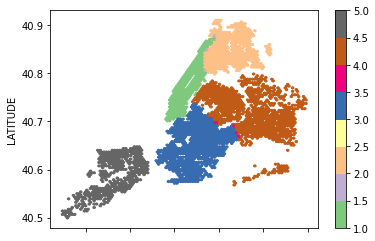

In [ ]:
valid_latlon = rats[(rats.LATITUDE > 30) & (rats.LONGITUDE < -70)]
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', C='BORO_CODE', cmap='Accent');

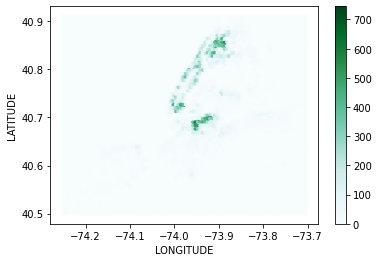

In [ ]:
# https://github.com/pandas-dev/pandas/issues/10678
#color shows the count concentration
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False);

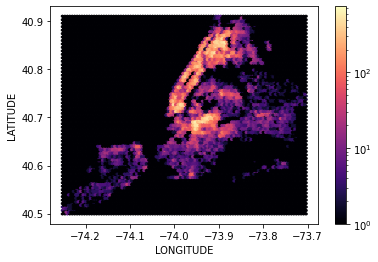

In [ ]:
#plot in logscale to see the range of values
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma');

In [ ]:
rats.groupby('BORO_CODE')['BORO_CODE'].count()

BORO_CODE
1    35572
2    32774
3    31446
4     9809
5     3246
9       20
Name: BORO_CODE, dtype: int64

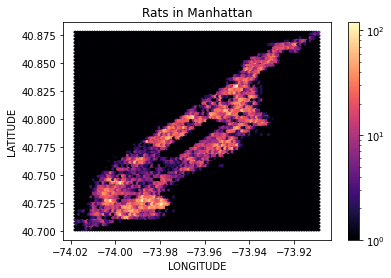

In [ ]:
manhattan_rats = valid_latlon[valid_latlon.BORO_CODE==1]
manhattan_rats.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')
plt.title('Rats in Manhattan');

> When do inspections happen during the week?

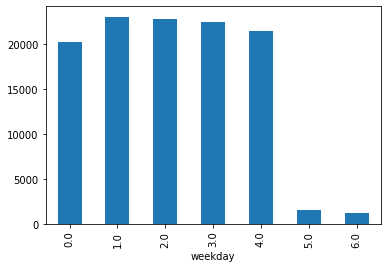

In [ ]:
inspection_date = pd.DatetimeIndex(rats.INSPECTION_DATE)

fig, ax = plt.subplots()
rats.groupby(inspection_date.weekday)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('weekday');

> When do inspections happen during the day?

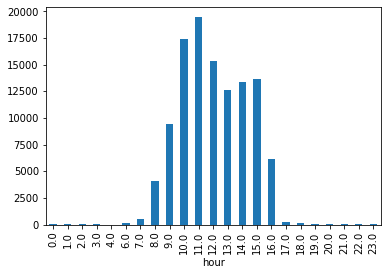

In [ ]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.hour)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('hour');

> When do inspections happen during the month?

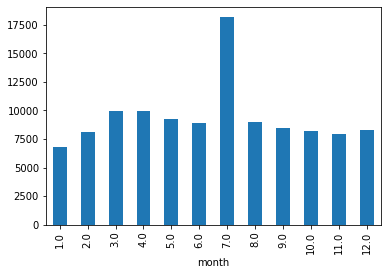

In [ ]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.month)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('month');